<a href="https://colab.research.google.com/github/mxmrtns/TinyML/blob/master/TinyMl_HelloWorld.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install tensorflow==2.0
import tensorflow as tf

# math library
import numpy as np

# graphing library
import matplotlib.pyplot as plt

# Python's math library
import math

In [0]:
SAMPLES = 1000

# Set a "seed" value, so we get the same random numbers each time we run this notebook. Any number can be used here.
SEED = 1234
np.random.seed(SEED)
tf.random.set_seed(SEED)

# Generate a uniformly distributed set of random numbers in the range from # 0 to 2π, which covers a complete sine wave oscillation
x_values = np.random.uniform(low=0, high=2*math.pi, size=SAMPLES)

# Shuffle the values to guarantee they're not in order
np.random.shuffle(x_values)

# Calculate the corresponding sine values
y_values = np.sin(x_values)

 # Add a small random number to each y value
y_values += 0.1 * np.random.randn(*y_values.shape)

# Plot our data. The 'b.' argument tells the library to print blue dots.
# plt.plot(x_values, y_values, 'b.')
# plt.show()

# We'll use 60% of our data for training and 20% for testing. The remaining 20% # will be used for validation. Calculate the indices of each section.
TRAIN_SPLIT = int(0.6 * SAMPLES)
TEST_SPLIT = int(0.2 * SAMPLES + TRAIN_SPLIT)

# Use np.split to chop our data into three parts.
# The second argument to np.split is an array of indices where the data will be split.
# We provide two indices, so the data will be divided into three chunks.
x_train, x_validate, x_test = np.split(x_values, [TRAIN_SPLIT, TEST_SPLIT])
y_train, y_validate, y_test = np.split(y_values, [TRAIN_SPLIT, TEST_SPLIT])

# Double check that our splits add up correctly
assert (x_train.size + x_validate.size + x_test.size) == SAMPLES

# Plot the data in each partition in different colors:
plt.plot(x_train, y_train, 'b.', label="Train")
plt.plot(x_validate, y_validate, 'g.', label="Validate")
plt.plot(x_test, y_test, 'r.', label="Test")
plt.legend()
plt.show()

In [4]:
# Using Keras to create the model structure
from tensorflow.keras import layers 
model_1 = tf.keras.Sequential()

# First layer takes a scalar input and feeds it through 16 "neurons."
# The neurons decide whether to activate based on the 'relu' activation function.
model_1.add(layers.Dense(16, activation='relu', input_shape=(1,)))

# Final layer is a single neuron, since we want to output a single value
model_1.add(layers.Dense(1))

# Compile the model using a standard optimizer and loss function for regression
model_1.compile(optimizer='rmsprop', loss='mse', metrics=['mae']) 

# Print a summary of the model's architecture
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


In [0]:
# To train a model in Keras we just call its fit() method, passing all of our data and some other important arguments
history_1 = model_1.fit(x_train, y_train, epochs=1000, batch_size=16, validation_data=(x_validate, y_validate))

In [0]:
# Extracting the training and validation loss data from the history object and plots it on a chart:
loss = history_1.history['loss']
val_loss = history_1.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

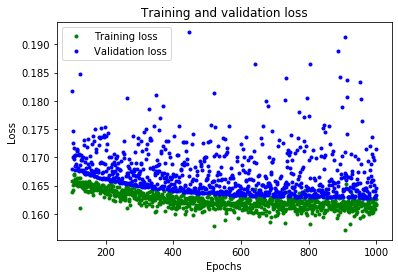

In [7]:
# Exclude the first few epochs so the graph is easier to read
SKIP = 100

plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

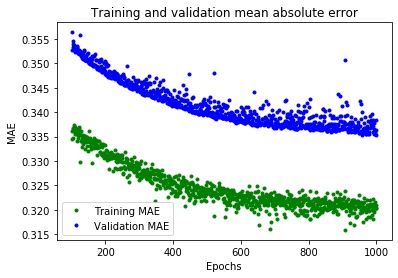

In [8]:
# Draw a graph of mean absolute error, which is another way of # measuring the amount of error in the prediction.
mae = history_1.history['mae']
val_mae = history_1.history['val_mae']

plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

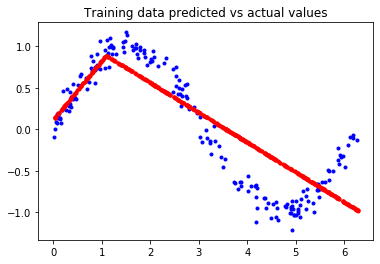

In [9]:
# Use the model to make predictions from our validation data
predictions = model_1.predict(x_train)

# Plot the predictions along with the test data
plt.clf()
plt.title('Training data predicted vs actual values')
plt.plot(x_test, y_test, 'b.', label='Actual')
plt.plot(x_train, predictions, 'r.', label='Predicted')